## Credit_Card_Default_Prediction_V1_4

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import scikitplot as skl
sns.set()
%matplotlib inline



In [2]:
train_set = pd.read_csv('Dataset/UCI_Credit_Card.csv')
train_set.rename(columns={'PAY_0':'PAY_1'},inplace=True)
train_set.rename(columns={'default.payment.next.month':'Def_pay'},inplace=True)
#train_set = df.iloc[0: , :]
train_set.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

ID : 30000 labels
LIMIT_BAL : 81 labels
SEX : 2 labels
EDUCATION : 7 labels
MARRIAGE : 4 labels
AGE : 56 labels
PAY_1 : 11 labels
PAY_2 : 11 labels
PAY_3 : 11 labels
PAY_4 : 11 labels
PAY_5 : 10 labels
PAY_6 : 10 labels
BILL_AMT1 : 22723 labels
BILL_AMT2 : 22346 labels
BILL_AMT3 : 22026 labels
BILL_AMT4 : 21548 labels
BILL_AMT5 : 21010 labels
BILL_AMT6 : 20604 labels
PAY_AMT1 : 7943 labels
PAY_AMT2 : 7899 labels
PAY_AMT3 : 7518 labels
PAY_AMT4 : 6937 labels
PAY_AMT5 : 6897 labels
PAY_AMT6 : 6939 labels
Def_pay : 2 labels


In [357]:
EDUCATION_map=train_set['EDUCATION'].value_counts().to_dict()

In [358]:
train_set['EDUCATION']=train_set['EDUCATION'].map(EDUCATION_map)
train_set.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Def_pay
0,1,20000.0,2,14030,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,14030,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,14030,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,14030,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,14030,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,10585,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,10585,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,14030,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,4917,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,4917,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [359]:
AGE_map=train_set['AGE'].value_counts().to_dict()

In [360]:
train_set['AGE']=train_set['AGE'].map(AGE_map)
train_set.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Def_pay
0,1,20000.0,2,14030,1,1127,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,14030,2,1256,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,14030,2,1162,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,14030,1,1041,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,14030,1,122,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,10585,2,1041,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,10585,2,1605,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,14030,2,931,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,4917,1,1409,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,4917,2,1113,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [361]:
SEX_map=train_set['SEX'].value_counts().to_dict()

In [362]:
train_set['SEX']=train_set['SEX'].map(SEX_map)
train_set.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Def_pay
0,1,20000.0,18112,14030,1,1127,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,18112,14030,2,1256,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,18112,14030,2,1162,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,18112,14030,1,1041,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,11888,14030,1,122,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,11888,10585,2,1041,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,11888,10585,2,1605,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,18112,14030,2,931,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,18112,4917,1,1409,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,11888,4917,2,1113,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [363]:
train_set.groupby(['MARRIAGE'])['Def_pay'].mean()
train_set.groupby(['MARRIAGE'])['Def_pay'].mean().sort_values().index

Int64Index([0, 2, 1, 3], dtype='int64', name='MARRIAGE')

In [364]:
mean_ordinal=train_set.groupby(['MARRIAGE'])['Def_pay'].mean().to_dict()

In [365]:
mean_ordinal
MARRIAGE_ordinal_labels=train_set.groupby(['MARRIAGE'])['Def_pay'].mean().sort_values().index
MARRIAGE_ordinal_labels

Int64Index([0, 2, 1, 3], dtype='int64', name='MARRIAGE')

In [366]:
enumerate(MARRIAGE_ordinal_labels,0)
MARRIAGE_ordinal_labels2={k:i for i,k in enumerate(MARRIAGE_ordinal_labels,0)}
MARRIAGE_ordinal_labels2

{0: 0, 2: 1, 1: 2, 3: 3}

In [367]:
train_set['Marriagemean_ordinal_encode']=train_set['MARRIAGE'].map(MARRIAGE_ordinal_labels2)
train_set.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Def_pay,Marriagemean_ordinal_encode
0,1,20000.0,18112,14030,1,1127,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2
1,2,120000.0,18112,14030,2,1256,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,3,90000.0,18112,14030,2,1162,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1
3,4,50000.0,18112,14030,1,1041,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,2
4,5,50000.0,11888,14030,1,122,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,2


In [42]:
def onehot_encode(train_set, column_dict):
    train_set = train_set.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(train_set[column], prefix=prefix)
        train_set = pd.concat([train_set, dummies], axis=1)
        train_set = train_set.drop(column, axis=1)
    return train_set

In [43]:
onehot_encode(
        train_set,
        {
            'EDUCATION': 'EDU',
            'MARRIAGE': 'MAR'
        })

,ID,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_2,MAR_3
0,1,20000.0,2,24,2,2,-1,-1,-2,-2,...,0,1,0,0,0,0,0,1,0,0
1,2,120000.0,2,26,-1,2,0,0,0,2,...,0,1,0,0,0,0,0,0,1,0
2,3,90000.0,2,34,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4,50000.0,2,37,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5,50000.0,1,57,-1,0,-1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,39,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
29996,29997,150000.0,1,43,-1,-1,-1,-1,0,0,...,0,0,1,0,0,0,0,0,1,0
29997,29998,30000.0,1,37,4,3,2,-1,0,0,...,0,1,0,0,0,0,0,0,1,0
29998,29999,80000.0,1,41,1,-1,0,0,0,-1,...,0,0,1,0,0,0,0,1,0,0


In [44]:
#train_set.rename(columns={'Marriagemean_ordinal_encode':'MARRIAGE_ORDINAL'},inplace=True)
X = train_set.drop(columns = ['ID','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','Def_pay'])
y = train_set['Def_pay']

In [45]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [46]:
def vif_score(x):
    scalar = StandardScaler()
    arr = scalar.fit_transform(x)
    return pd.DataFrame([[x.columns[i],variance_inflation_factor(arr,i)] for i in range (arr.shape[1])],columns=["Feature","VIF Score"])

vif_score(X)

,Feature,VIF Score
0,LIMIT_BAL,1.371690
1,SEX,1.022802
2,EDUCATION,1.118798
3,MARRIAGE,1.229465
4,AGE,1.274779
5,PAY_1,1.907979
6,PAY_2,3.122984
7,PAY_3,3.633850
8,PAY_4,4.272632
9,PAY_5,4.699985


In [47]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [48]:
#-------------- 
# Naive Bayes 
#--------------
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit( x_train, y_train )
y_pred = classifier3.predict( x_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for NBClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(x_test)))
scoresNB = cross_val_score( classifier3, x_train, y_train, cv=10)
print("Mean NaiveBayes CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresNB.mean(), scoresNB.std() ))

Accuracy on Test Set for NBClassifier = 0.69
Mean NaiveBayes CrossVal Accuracy on Train Set 0.69, with std=0.04


In [49]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[4050, 1779],
       [ 556, 1115]], dtype=int64)

In [50]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [51]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.6886666666666666

In [52]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.6948018528049408

In [53]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8792878853669127

In [54]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.776233828461907

In [55]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6810334817585446

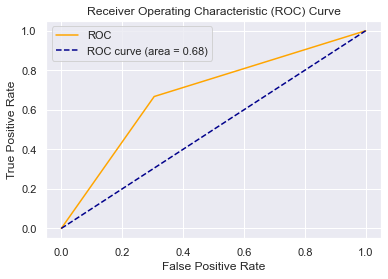

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [57]:
import pickle

filename = 'finalized_model'
with open(filename, 'wb') as f:
    # save the model to disk
    pickle.dump(classifier3,f)
 

 
# load the model from disk
with open(filename, 'rb') as f:
    mp = pickle.load(f)


In [58]:
mp.predict([[23466]])

array([0], dtype=int64)

In [59]:
mp.predict([[6000,2,2,1,33,2,2,0,0,0,0,1,2,3,0,0,5000]])

array([0], dtype=int64)